# File Setup

In [1]:
#dependecies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import random as random

In [2]:
df = pd.read_csv('Resources/clean_merge_df.csv')
print(df.columns)
df.head()

Index(['Title', 'Type', 'Genre', 'Year', 'Date Added', 'Director', 'Runtime',
       'Duration', 'Country', 'Language', 'Rotten Tomatoes Rating',
       'IMDB Rating', 'Advisory Rating', 'Advisory Age', 'Disney+'],
      dtype='object')


,Title,Type,Genre,Year,Date Added,Director,Runtime,Duration,Country,Language,Rotten Tomatoes Rating,IMDB Rating,Advisory Rating,Advisory Age,Disney+
0,10 Things I Hate About You,Movie,"Comedy, Drama, Romance",1999,"November 12, 2019",Gil Junger,97.0,NaN,USA,"English, French",67.0,7.3,PG-13,16+,1
1,101 Dalmatian Street,TV Show,"Animation, Comedy, Family",2018,"February 28, 2020",NaN,NaN,1.0,"UK, USA, Canada",English,44.0,6.2,TV-Y7,7+,1
2,101 Dalmatians,Movie,"Adventure, Comedy, Crime, Family",1996,"November 12, 2019",Stephen Herek,103.0,NaN,"USA, UK","English, Spanish",21.0,5.7,G,NaN,1
3,101 Dalmatians 2: Patch's London Adventure,Movie,"Animation, Adventure, Comedy, Family, Musical",2002,"November 12, 2019","Jim Kammerud, Brian Smith",74.0,NaN,USA,English,NaN,5.8,G,NaN,1
4,102 Dalmatians,Movie,"Adventure, Comedy, Family",2000,"November 12, 2019",Kevin Lima,100.0,NaN,"USA, UK",English,60.0,4.9,G,all,1


In [3]:
#manual cleaning for analyses
df['Month Added'] = df.loc[:,'Date Added'].str.split(' ', expand = True)[0]
df['Year Added'] = df.loc[:,'Date Added'].str.split(' ', expand = True)[2].str.strip()
df.head()

,Title,Type,Genre,Year,Date Added,Director,Runtime,Duration,Country,Language,Rotten Tomatoes Rating,IMDB Rating,Advisory Rating,Advisory Age,Disney+,Month Added,Year Added
0,10 Things I Hate About You,Movie,"Comedy, Drama, Romance",1999,"November 12, 2019",Gil Junger,97.0,NaN,USA,"English, French",67.0,7.3,PG-13,16+,1,November,2019
1,101 Dalmatian Street,TV Show,"Animation, Comedy, Family",2018,"February 28, 2020",NaN,NaN,1.0,"UK, USA, Canada",English,44.0,6.2,TV-Y7,7+,1,February,2020
2,101 Dalmatians,Movie,"Adventure, Comedy, Crime, Family",1996,"November 12, 2019",Stephen Herek,103.0,NaN,"USA, UK","English, Spanish",21.0,5.7,G,NaN,1,November,2019
3,101 Dalmatians 2: Patch's London Adventure,Movie,"Animation, Adventure, Comedy, Family, Musical",2002,"November 12, 2019","Jim Kammerud, Brian Smith",74.0,NaN,USA,English,NaN,5.8,G,NaN,1,November,2019
4,102 Dalmatians,Movie,"Adventure, Comedy, Family",2000,"November 12, 2019",Kevin Lima,100.0,NaN,"USA, UK",English,60.0,4.9,G,all,1,November,2019


In [4]:
#separating movies and tv shows
movie_df = df.loc[df['Type'] == 'Movie']
tv_df = df.loc[df['Type'] == 'TV Show']

# User-Defined Functions

In [5]:
#extract function to pull out categorical data
def extract(df, input_column):
    return df.loc[:, input_column].dropna(axis = 0).str.split(',', expand = False).tolist()

In [6]:
#flattening functions to allow for counting
def flatten(df, input_column):
    input_list = extract(df, input_column)
    return_list = []
    
    for i in range(len(input_list)):
        for j in range(len(input_list[i])):
            return_list.append(input_list[i][j].strip())
    return return_list

In [7]:
#frequency counter function to count categorical data
def frequency(df, input_column):
    input_list = flatten(df, input_column)
    return_dict = {}
    
    for element in input_list:
        if (element in return_dict):
            return_dict[element] += 1
        else:
            return_dict[element] = 1
    return pd.Series(return_dict).sort_values(ascending = False)

In [8]:
#keeps top five results of a frequency 
def top_five(df, input_column):
    input_series = frequency(df, input_column)
    
    input_series_x = input_series.index.tolist()[0:5]
    input_series_x.append('Other')
    
    input_series_y = input_series.values.tolist()
    other_sum = sum(input_series_y[5:-1])
    input_series_y = input_series_y[0:5]
    input_series_y.append(other_sum)

    return pd.Series(input_series_y, index = input_series_x)

In [9]:
#keeps top five results of a frequency 
def top_ten(df, input_column):
    input_series = frequency(df, input_column)
    
    input_series_x = input_series.index.tolist()[0:10]
    input_series_x.append('Other')
    
    input_series_y = input_series.values.tolist()
    other_sum = sum(input_series_y[10:-1])
    input_series_y = input_series_y[0:10]
    input_series_y.append(other_sum)

    return pd.Series(input_series_y, index = input_series_x)

# Ratings Bar Chart

In [10]:
#advisory ratings raw
advisory_rating_mov = top_five(movie_df, 'Advisory Rating')
advisory_rating_tv = top_five(tv_df, 'Advisory Rating')

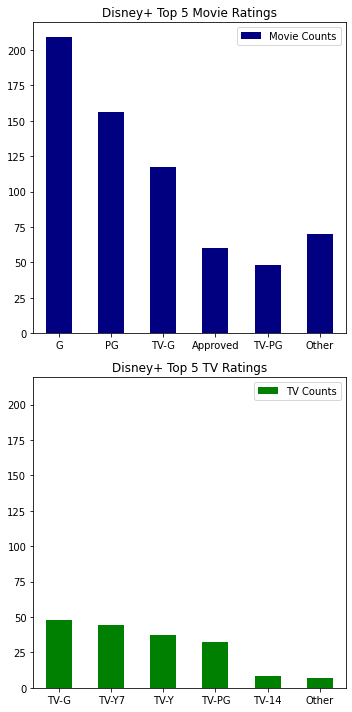

In [57]:
#plotting
fig, (gr0, gr1) = plt.subplots(2, 1, figsize = (5,10), sharey = True)

# fig.supxlabel("Most Frequent Adivsory Ratings on Disney+")
# fig.supylabel("Counts")
advisory_rating_mov.plot(kind = 'bar', ax = gr0, color = 'navy', label = 'Movie Counts')
advisory_rating_tv.plot(kind = 'bar', ax = gr1, color = 'green', label = 'TV Counts')
gr0.set_title("Disney+ Top 5 Movie Ratings")
gr1.set_title("Disney+ Top 5 TV Ratings")
plt.setp(gr0.xaxis.get_majorticklabels(), rotation=0)
plt.setp(gr1.xaxis.get_majorticklabels(), rotation=0)
gr0.legend(loc = 'best')
gr1.legend(loc = 'best')
plt.tight_layout()
plt.savefig("Images/Ratings.png")

# Country, Language Double Bar

In [12]:
#advisory ratings raw
country_mov = top_five(movie_df, 'Country')
country_tv = top_five(tv_df, 'Country')
language_mov = top_five(movie_df, 'Language')
language_tv = top_five(tv_df, 'Language')

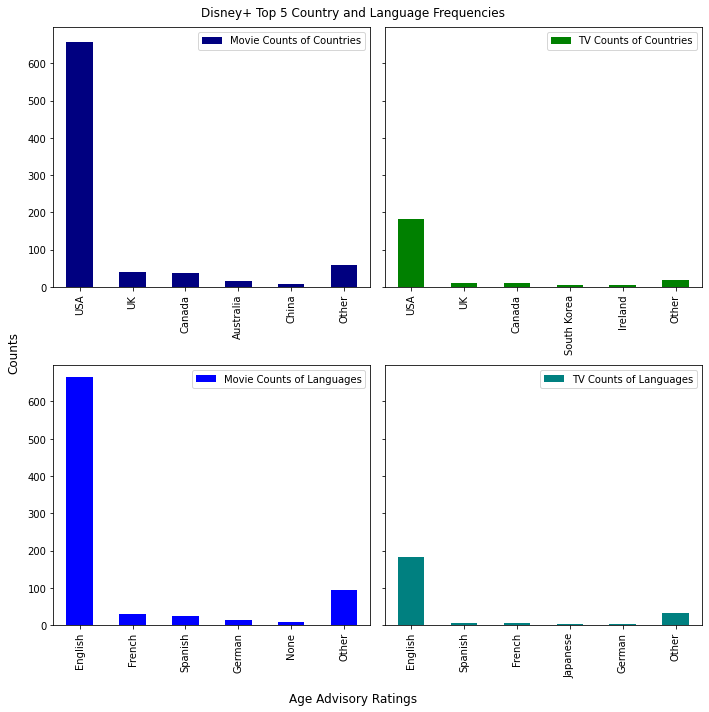

In [30]:
#plotting
fig, ((gr0, gr1), (gr2, gr3)) = plt.subplots(2, 2, figsize = (10,10), sharey = True)
fig.suptitle("Disney+ Top 5 Country and Language Frequencies")
fig.supxlabel("Age Advisory Ratings")
fig.supylabel("Counts")
country_mov.plot(kind = 'bar', ax = gr0, color = 'navy', label = 'Movie Counts of Countries')
country_tv.plot(kind = 'bar', ax = gr1, color = 'green', label = 'TV Counts of Countries')
language_mov.plot(kind = 'bar', ax = gr2, color = 'blue', label = 'Movie Counts of Languages')
language_tv.plot(kind = 'bar', ax = gr3, color = 'teal', label = 'TV Counts of Languages')
gr0.legend(loc = 'best')
gr1.legend(loc = 'best')
gr2.legend(loc = 'best')
gr3.legend(loc = 'best')
plt.tight_layout()
plt.savefig("Images/Country_Ratings.png")

# Genre

In [14]:
#getting values
genre_mov = top_ten(movie_df, 'Genre')
genre_tv = top_ten(tv_df, 'Genre')

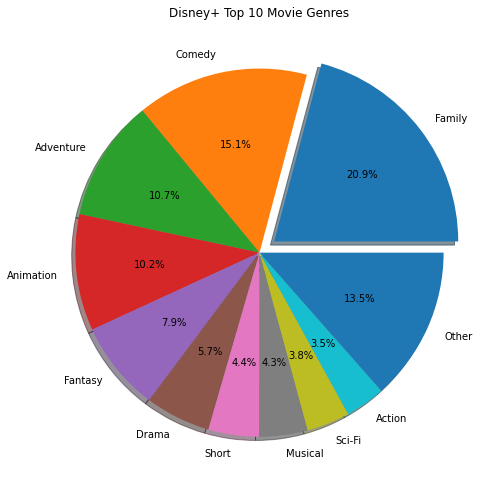

In [70]:
#variables
explosion_values = [0.1,0,0,0,0,0,0,0,0,0,0]
color_values = ['white', 'crimson', 'orange', 'yellow', 'lawngreen', 'turquoise', 'deepskyblue', 'navy', 'darkviolet', 'deeppink', 'gray']

#plotting
plt.figure(figsize = (7,7))
plt.title("Disney+ Top 10 Movie Genres")
# plt.xlabel("Movies")
plt.pie(genre_mov.values.tolist(), labels = genre_mov.index.tolist(), explode = explosion_values, autopct = '%1.1f%%', shadow = True)
plt.tight_layout()
plt.savefig("Images/Genres1.png")

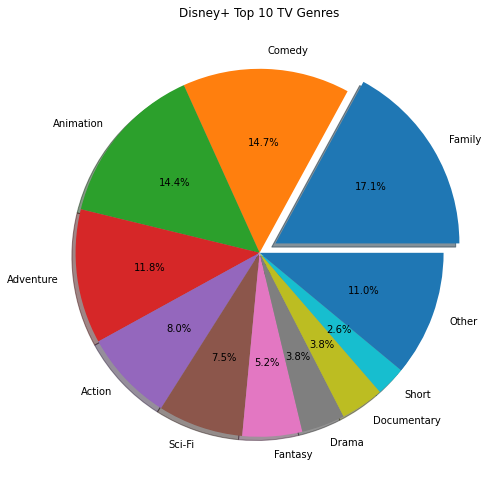

In [72]:
#variables
explosion_values = [0.1,0,0,0,0,0,0,0,0,0,0]

#plotting
plt.figure(figsize = (7,7))
plt.title("Disney+ Top 10 TV Genres")
# plt.xlabel("TV Shows")
plt.pie(genre_tv.values.tolist(), labels = genre_tv.index.tolist(), explode = explosion_values, autopct = '%1.1f%%', shadow = True)
plt.tight_layout()
plt.savefig("Images/Genres2.png")

# Age Rating

In [17]:
#extracting information
age_mov = top_five(movie_df, 'Advisory Age')
age_tv = top_five(tv_df, 'Advisory Age')

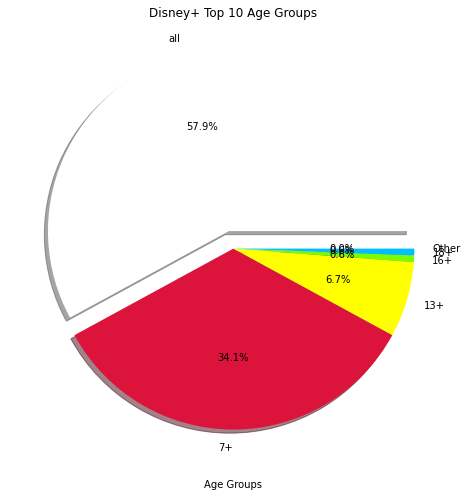

In [18]:
#variables
explosion_values = [0.1,0,0,0,0,0]
color_values = ['white', 'crimson', 'yellow', 'lawngreen', 'deepskyblue']

#plotting
plt.figure(figsize = (7,7))
plt.title("Disney+ Top 10 Age Groups")
plt.xlabel("Age Groups")
plt.pie(age_mov.values.tolist(), labels = age_mov.index.tolist(), explode = explosion_values, colors = color_values, autopct = '%1.1f%%', shadow = True)
plt.tight_layout()
plt.savefig("Images/Age1.png")

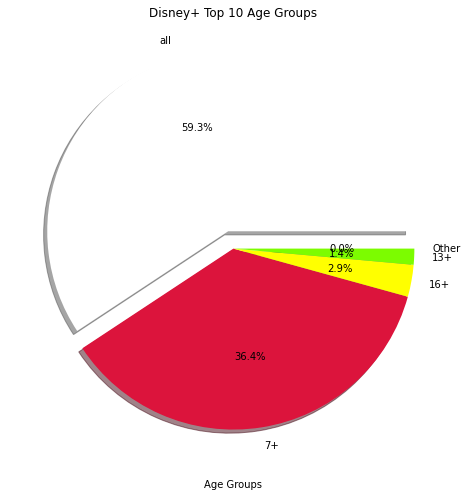

In [19]:
#variables
explosion_values = [0.1,0,0,0,0]
color_values = ['white', 'crimson', 'yellow', 'lawngreen', 'deepskyblue']

#plotting
plt.figure(figsize = (7,7))
plt.title("Disney+ Top 10 Age Groups")
plt.xlabel("Age Groups")
plt.pie(age_tv.values.tolist(), labels = age_tv.index.tolist(), explode = explosion_values, colors = color_values, autopct = '%1.1f%%', shadow = True)
plt.tight_layout()
plt.savefig("Images/Age2.png")

# Boxplot

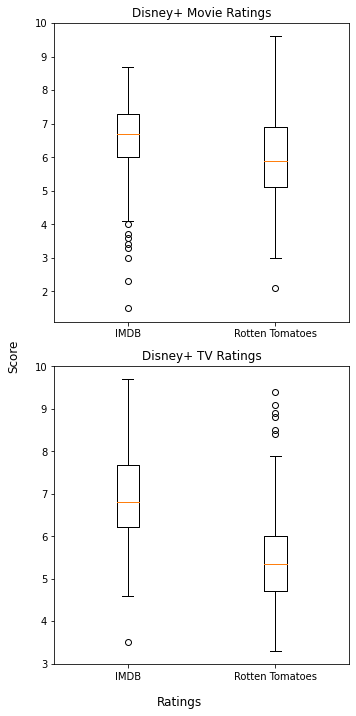

In [42]:
#plotting
fig, (gr0, gr1) = plt.subplots(2, 1, figsize = (5, 10))
# fig.suptitle("Disney+ Ratings")
fig.supxlabel("Ratings")
fig.supylabel("Score")
mov_data = [movie_df['IMDB Rating'].dropna(), movie_df['Rotten Tomatoes Rating'].dropna()/10]
tv_data = [tv_df['IMDB Rating'].dropna(), tv_df['Rotten Tomatoes Rating'].dropna()/10]

gr0.boxplot(mov_data, labels = ['IMDB', 'Rotten Tomatoes'])
gr0.set_title('Disney+ Movie Ratings')
gr1.boxplot(tv_data, labels = ['IMDB', 'Rotten Tomatoes'])
gr1.set_title('Disney+ TV Ratings')

plt.tight_layout()
plt.savefig("Images/BoxRatings.png")

# Year Line Graph

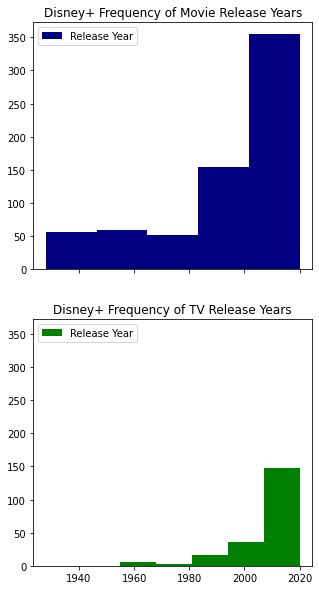

In [68]:
#plotting
fig, (gr0, gr1) = plt.subplots(2, 1, sharex = True, sharey = True, figsize = (5,10))
# # fig.suptitle("Disney+ Release Frequency by Year")
# fig.supxlabel("Year")
# fig.supylabel("Count")

mov_release_x = movie_df['Year'].value_counts().sort_index().index.astype(int).tolist()
mov_release_y = movie_df['Year'].value_counts().sort_index().values.astype(int).tolist()
mov_added_x = movie_df['Year Added'].value_counts().sort_index().index.astype(int).tolist()
mov_added_y = movie_df['Year Added'].value_counts().sort_index().values.astype(int).tolist()

tv_release_x = tv_df['Year'].value_counts().sort_index().index.astype(int).tolist()
tv_release_y = tv_df['Year'].value_counts().sort_index().values.astype(int).tolist()
tv_added_x = tv_df['Year Added'].value_counts().sort_index().index.astype(int).tolist()
tv_added_y = tv_df['Year Added'].value_counts().sort_index().values.astype(int).tolist()

gr0.hist(movie_df['Year'], bins = 5, color = 'navy', label = 'Release Year')
gr0.set_title("Disney+ Frequency of Movie Release Years")
gr1.set_title("Disney+ Frequency of TV Release Years")
gr1.hist(tv_df['Year'], bins = 5, color = 'green', label = 'Release Year')

gr0.legend(loc = 'upper left')
gr1.legend(loc = 'upper left')
plt.tight_layout
plt.savefig("Images/YearsReleaseAdded.png")

# Month Line Graph

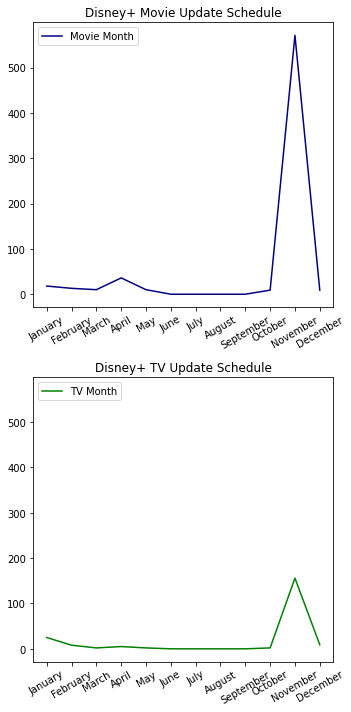

In [66]:
#plotting
fig, (gr0, gr1) = plt.subplots(2, 1, figsize = (5,10), sharey = True)
# fig.suptitle("Disney+ Update Schedule")
# fig.supxlabel("Time")
# fig.supylabel("Counts")

months_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_xticks = [1,2,3,4,5,6,7,8,9,10,11,12]

avail_mov_mon_y = movie_df['Month Added'].value_counts().tolist()
avail_mov_mon_x = movie_df['Month Added'].value_counts().index.tolist()
complete_mov_mon_x = avail_mov_mon_x
mapper_list = [months_labels.index(element) for element in complete_mov_mon_x]

complete_mov_mon_y = []
for i in range(len(months_labels)):
    if i in mapper_list:
        complete_mov_mon_y.append(avail_mov_mon_y[mapper_list.index(i)])
    else:
        complete_mov_mon_y.append(0)
    

gr0.plot(months_labels, complete_mov_mon_y, color = 'navy', label = 'Movie Month')
plt.setp(gr0.xaxis.get_majorticklabels(), rotation=30)

avail_tv_mon_y = tv_df['Month Added'].value_counts().tolist()
avail_tv_mon_x = tv_df['Month Added'].value_counts().index.tolist()
complete_tv_mon_x = avail_tv_mon_x
mapper_list = [months_labels.index(element) for element in complete_tv_mon_x]

complete_tv_mon_y = []
for i in range(len(months_labels)):
    if i in mapper_list:
        complete_tv_mon_y.append(avail_tv_mon_y[mapper_list.index(i)])
    else:
        complete_tv_mon_y.append(0)

gr1.plot(months_labels, complete_tv_mon_y, color = 'green', label = 'TV Month')
plt.setp(gr1.xaxis.get_majorticklabels(), rotation=30)

gr0.set_title("Disney+ Movie Update Schedule")
gr1.set_title("Disney+ TV Update Schedule")

gr0.legend(loc = 'best')
gr1.legend(loc = 'upper left')
plt.tight_layout()
plt.savefig("Images/MonthsReleaseAdded.png")

# Analysis for General Stream-Consumer

Summary statistics table
- total number of offerings
- count of country / language
- max, min, mean, med of IMDB/Rotten ratings

Summary statistics table
- count of each genre

Scatterplot (Runtime/Duration vs Rating)
- Reveal if length has a impact on rating
